In [12]:
import pandas as pd
import numpy as np

print('numpy version - ',np.__version__)
print('pandas version -',pd.__version__)
# ml
import sklearn
from sklearn.datasets import load_iris,load_breast_cancer

print('sklearn version - ',sklearn.__version__)


from sklearn.model_selection import KFold, StratifiedKFold,cross_val_score,\
cross_validate,GridSearchCV 
from sklearn.tree            import DecisionTreeClassifier 
from sklearn.metrics         import accuracy_score 

numpy version -  1.20.3
pandas version - 1.3.4
sklearn version -  0.24.2


In [13]:
iris = load_iris()
print('type -',type(iris))
print('keys - ',iris.keys(), type(iris.keys()))

type - <class 'sklearn.utils.Bunch'>
keys -  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']) <class 'dict_keys'>


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data,
                                                   iris.target,
                                                   test_size = 0.2,
                                                   random_state= 200)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [33]:
print('불순도(impurity)-해당 범주안에 서로 다른 데이터가 얼마나 섞여있는지-')
print('엔트로피(entropy)-불순도를 수치적으로 나타낸 척도')
print('지니(gini)-불순도를 수치적으로 나타낸 척도')

gscv_dtc_model = DecisionTreeClassifier()

param = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[1,2,5,8],# 깊이가 깊어지면 과적합이 될 수 있다.
    'min_samples_split':[2,3,4,5]
}

불순도(impurity)-해당 범주안에 서로 다른 데이터가 얼마나 섞여있는지-
엔트로피(entropy)-불순도를 수치적으로 나타낸 척도
지니(gini)-불순도를 수치적으로 나타낸 척도


In [34]:
print('GridSearchCV를 이용한 최적의 모델을 만드는 방법 - ')
grid_tree = GridSearchCV(gscv_dtc_model,
                        param_grid = param,
                        cv = 5,
                        refit = True)

GridSearchCV를 이용한 최적의 모델을 만드는 방법 - 


In [35]:
grid_tree.fit(x_train,y_train)
grid_tree.cv_results_

{'mean_fit_time': array([1.08671188e-03, 3.99065018e-04, 4.25100327e-04, 2.72703171e-04,
        4.60433960e-04, 2.00176239e-04, 3.98874283e-04, 1.32083893e-05,
        6.83164597e-04, 9.97304916e-04, 7.52115250e-04, 9.97257233e-04,
        8.23068619e-04, 3.98731232e-04, 4.41026688e-04, 5.98144531e-04,
        3.98969650e-04, 9.43470001e-04, 1.01342201e-03, 1.98078156e-04,
        1.02100372e-03, 6.80255890e-04, 3.99017334e-04, 1.99413300e-04,
        6.45685196e-04, 1.05156898e-03, 3.20148468e-04, 8.03804398e-04,
        7.91788101e-04, 3.33786011e-04, 6.03437424e-04, 1.94311142e-04,
        8.33749771e-04, 8.04185867e-04, 7.08723068e-04, 2.96688080e-04,
        5.91945648e-04, 7.97557831e-04, 5.68294525e-04, 2.74276733e-04,
        8.05521011e-04, 0.00000000e+00, 3.98921967e-04, 4.89997864e-04,
        6.66475296e-04, 6.29806519e-04, 6.06012344e-04, 3.69405746e-04,
        5.98430634e-04, 8.49676132e-04, 9.60254669e-04, 8.48388672e-04,
        5.79929352e-04, 3.68499756e-04, 0.00000

In [36]:
print('최적의 파라미터 확인 - ')
print(grid_tree.best_params_)
print()
print('최적의 파라미터의 정확도 - ')
print(grid_tree.best_score_)

최적의 파라미터 확인 - 
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'splitter': 'random'}

최적의 파라미터의 정확도 - 
0.9666666666666668


In [37]:
# GridSearchCV의 refit = False로 해서 오류 발생
# 오류 : GridSearchCV' object has no attribute 'best_estimator_
estimator = grid_tree.best_estimator_ #estimatr:학습기
y_pred = estimator.predict(x_test) # 재학습
print('answer - \n',y_test)
print()
print('guess - \n', y_pred)
print()
print('acc  - \n', accuracy_score(y_test, y_pred))

answer - 
 [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 2 0 0 0 1 2 2 1]

guess - 
 [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 1 1 2 0 1 1 0 0 0 1 2 2 1]

acc  - 
 0.9333333333333333


In [38]:
gscv_dtc_best_model = DecisionTreeClassifier(criterion='gini', 
                                        max_depth=5, 
                                        min_samples_split=2, 
                                        splitter = 'random',
                                        )
gscv_dtc_best_model.fit(x_train,y_train)
y_pred = gscv_dtc_best_model.predict(x_test)
print('answer - \n',y_test)
print()
print('guess - \n', y_pred)
print()
print('acc  - \n', accuracy_score(y_test, y_pred))

answer - 
 [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 2 0 0 0 1 2 2 1]

guess - 
 [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 2 0 0 0 1 2 2 1]

acc  - 
 1.0


In [39]:
import seaborn as sns
print('feature importance - ')
print(estimator.feature_importances_)

feature importance - 
[0.         0.12545841 0.11097928 0.76356231]


In [40]:
for name, value in zip(iris.feature_names , estimator.feature_importances_):
    print(name, '\t', value)

sepal length (cm) 	 0.0
sepal width (cm) 	 0.1254584057131828
petal length (cm) 	 0.11097928201712394
petal width (cm) 	 0.7635623122696933


<AxesSubplot:>

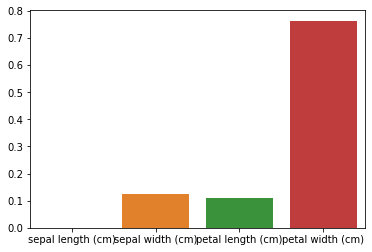

In [42]:
sns.barplot(x = iris.feature_names, y = estimator.feature_importances_)

In [53]:
cancer = pd.DataFrame(load_breast_cancer().data, 
                      columns = load_breast_cancer().feature_names)
cancer['target'] = load_breast_cancer().target
cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [45]:
load_breast_cancer().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [47]:
load_breast_cancer().data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])